# 12_Linear_regression

## Perform linear regressions of salinity vs temperature and dec vs salinity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
path = "./BD/bd_exercises_curse.csv"
bd_data = pd.read_csv(path)
print(bd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

### Salinity vs Temperature

In [12]:
y = bd_data['sal_psu']
x = bd_data['temp_c']

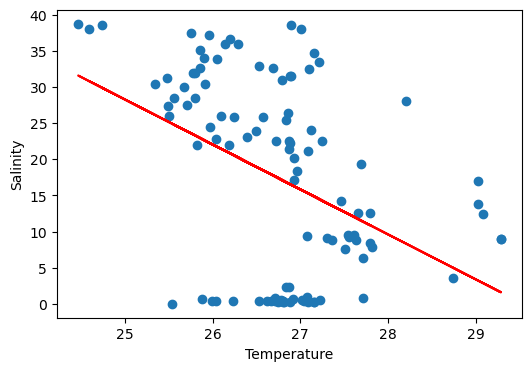

Slope:  -6.237079764689512


In [13]:
plt.scatter(x, y, label='Salinity vs Temperature')

plt.xlabel('Temperature')
plt.ylabel('Salinity')

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)
plt.show()
print('Slope: ', slope)


In [14]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -6.237079764689512
intercept: 184.22846870564854


### Dec vs Salinity

In [15]:
print(bd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

In [16]:
x = bd_data['depth_m']
y = bd_data['sal_psu']

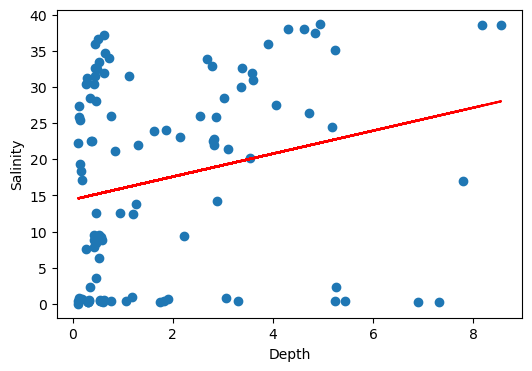

Slope:  1.5897949039728072


In [17]:
plt.scatter(x, y, label='Salinity vs Depth')

plt.xlabel('Depth')
plt.ylabel('Salinity')

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)
plt.show()
print('Slope: ', slope)

In [18]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)


r-squared: 0.05697327076065062
p_value: 0.013737311409359132
slope: 1.5897949039728072
intercept: 14.422401490697991


#### OLS

In [20]:
import statsmodels.api as sm
import numpy as np

In [21]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                sal_psu   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.283
Date:              dom., 31 ago. 2025   Prob (F-statistic):             0.0137
Time:                        10:57:54   Log-Likelihood:                -423.30
No. Observations:                 106   AIC:                             850.6
Df Residuals:                     104   BIC:                             855.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4224      1.733      8.322      0.0

In [22]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.057
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 14.4224, p = 0.0000 → ✔️ Significant (p < 0.05)
- depth_m: Coef = 1.5898, p = 0.0137 → ✔️ Significant (p < 0.05)

Slope (depth_m): 1.5898, p = 0.0137 → ✔️ Significant

Standard Error of the model: 13.2497
